In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)


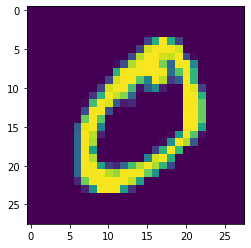

In [3]:
print(x_train.shape)
plt.imshow(x_train[1])

In [4]:
# Adding noise to images
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(60000, 28, 28)


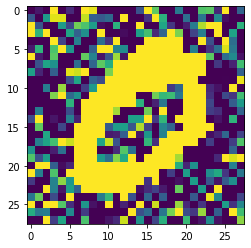

In [5]:
print(x_train_noisy.shape)
plt.imshow(x_train_noisy[1])

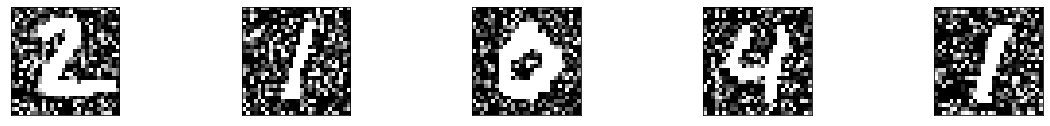

In [6]:
# Plotting some noisy images
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
# Defining autoencoder
model = Sequential()

# Encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

# Decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))

model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

2024-01-21 15:33:26.820235: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 15:33:26.820571: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 35)        350       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 35)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 25)        7900      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 25)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 25)          5650      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 35)        7

In [10]:
#Train the auto encoder
# Note that train data is the noisy data
# test data is the original data
# we are training a Auto encoder-decoder model to construct images from noisy images
model.fit(x_train_noisy, 
          x_train, 
          epochs=15, 
          batch_size=128, 
          validation_data=(x_test_noisy, x_test))

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [ ]:
# Making predictions with a trained autoencoder to generate the denoised image
pred = model.predict(x_test_noisy)
# Checking results
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()